### Checklist de evaluación
Sugerencias para desarrollar el proyecto:

La resolución del proyecto te puede enfrentar a desafíos que no trabajamos durante los encuentros. Es importante que desarrolles la capacidad de resolverlos. Para ello, consulta las bitácoras, las referencias, los notebooks vistos en clase, la documentación de la librería y, sobre todo, googlea.
Los pasos deben estar correctamente justificados.
Las preguntas que se respondan deben estar correctamente explicitadas.
Imagina que este proyecto lo usarías para presentar en una entrevista de trabajo, o que lo debes presentar en tu trabajo. Presta mucha atención a la redacción, presentación de gráficos, etc.
Antes de subir tu proyecto a la plataforma Acámica para que sea evaluado, verifica que el Notebook se ejecute sin errores. Además, asegúrate de cumplir con las siguientes condiciones (son las que los/as evaluadores/as tendrán en consideración al momento de corregir tu trabajo):

#### Parte A - Exploración de Datos

1- El Análisis Exploratorio de Datos debe servir para comprender el dataset y todo el flujo de trabajo que le siga.
2- Debes responder al menos una pregunta original con este dataset. La pregunta debe estar correctamente explicitada.
#### Parte B - Modelo de Machine Learning

1- Debes evaluar correctamente el modelo que realices. Esto implica un correcto manejo de datos de Train y Test, elegir una métrica apropiada y justificar su elección, y comparar los resultados contra un modelo benchmark.

2- Puedes aplicar más de una de las técnicas vistas para crear tus modelos. Pero ten en cuenta que es preferible un modelo bien hecho (apropiada transformación de datos, optimización de hiperparámetros y análisis de sus resultados) que muchos modelos a medias. En caso de entrenar más de un modelo, debes comparar sus resultados y justificar cuál elegirías.

3- Si el modelo lo permite, debes explorar qué información utiliza para predecir e interpretar ese resultado. ¿Coincide con lo que esperabas a partir de tu experiencia con el dataset?
#### Parte C - Investigación

1- Debes explicar qué te gustaría probar, por qué y cómo lo harías. Si tienes referencias (por ejemplo, un artículo que hayas encontrado, capítulo de libro, etc.), debes mencionarlas.

2- Debes comentar también qué resultados esperas encontrar. Por ejemplo, puedes implementar una prueba rápida y mostrar resultados preliminares, para ver si estás correctamente orientado.

In [151]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import itertools

In [2]:
data=pd.read_json(r'C:\Users\Alfredo\Bitácoras\dataset_es_dev.json',lines=True)

In [3]:
data.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel


In [4]:
data_train=pd.read_json(r'C:\Users\Alfredo\Bitácoras\dataset_es_train.json',lines=True)

In [5]:
data_train.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics


In [6]:
data_test=pd.read_json(r'C:\Users\Alfredo\Bitácoras\dataset_es_test.json',lines=True)

In [7]:
data_test.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home


In [8]:
print('Cantidad de filas y columnas del data: ',data.shape)
print('Cantidad de filas y columnas del data test: ',data_test.shape)
print('Cantidad de filas y columnas del data train: ',data_train.shape)

Cantidad de filas y columnas del data:  (5000, 8)
Cantidad de filas y columnas del data test:  (5000, 8)
Cantidad de filas y columnas del data train:  (200000, 8)


In [9]:
data.describe()

,stars
count,5000.000000
mean,3.000000
std,1.414355
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


### Are there missing values?

In [10]:
print("##--->  Datos faltantes de DATA: <---##\n",data.isna().sum())
print("##--->  Datos faltantes de DATA_TRAIN  <---##:\n",data_train.isna().sum())
print("##--->  Datos faltantes de DATA_TEST  <---##:\n",data_test.isna().sum())

##--->  Datos faltantes de DATA: <---##
 review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64
##--->  Datos faltantes de DATA_TRAIN  <---##:
 review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64
##--->  Datos faltantes de DATA_TEST  <---##:
 review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64


In [11]:
print("##--->  INFO de DATA:  <---##\n")
data.info()
print("\n##--->  INFO de DATA_TRAIN  <---##:\n")
data_train.info()
print("\n##--->  INFO de DATA_TEST  <---##:\n")
data_test.info()

##--->  INFO de DATA:  <---##

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_id         5000 non-null   object
 1   product_id        5000 non-null   object
 2   reviewer_id       5000 non-null   object
 3   stars             5000 non-null   int64 
 4   review_body       5000 non-null   object
 5   review_title      5000 non-null   object
 6   language          5000 non-null   object
 7   product_category  5000 non-null   object
dtypes: int64(1), object(7)
memory usage: 312.6+ KB

##--->  INFO de DATA_TRAIN  <---##:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         200000 non-null  object
 1   product_id        200000 non-null  object
 2   reviewer_i

# Concatenating all data frames
### Genero ademas un dataset que contenga el 30 porciento de cada uno de los puntajes, para no tener que trabajar con un data frame tan extenso, ni tan chico.
<img src=https://www.analyticslane.com/wp-content/uploads/2018/08/t-1723941_1920-1536x974.jpg>


In [114]:
frames = [data, data_test, data_train]
datasets=[data_test, data]
result = pd.concat(frames)
porcientotreinta5=(result.stars==5)
porcientotreinta5=result[porcientotreinta5][0:12600].copy()
porcientotreinta4=(result.stars==4)
porcientotreinta4=result[porcientotreinta4][0:12600].copy()
porcientotreinta3=(result.stars==3)
porcientotreinta3=result[porcientotreinta3][0:12600].copy()
porcientotreinta2=(result.stars==2)
porcientotreinta2=result[porcientotreinta2][0:12600].copy()
porcientotreinta1=(result.stars==1)
porcientotreinta1=result[porcientotreinta1][0:12600].copy()
porcientotreinta=[porcientotreinta1,porcientotreinta2,porcientotreinta3,porcientotreinta4,porcientotreinta5]
pc30=pd.concat(porcientotreinta)
pc30.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,Cat_product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless,29
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel,0


### En el siguiente countplot, vemos en orden descendente la cantidad de reseñas por categoría.

home                        28328
wireless                    27208
toy                         14328
sports                      13856
pc                          11720
home_improvement            11468
electronics                 10899
beauty                       7707
automotive                   7495
kitchen                      7028
apparel                      6014
drugstore                    5778
book                         5528
furniture                    5481
baby_product                 5098
office_product               5010
lawn_and_garden              4449
other                        4131
pet_products                 3899
personal_care_appliances     3735
luggage                      3509
camera                       3180
shoes                        2886
digital_ebook_purchase       1936
video_games                  1818
jewelry                      1677
musical_instruments          1608
watch                        1567
industrial_supplies          1552
grocery       

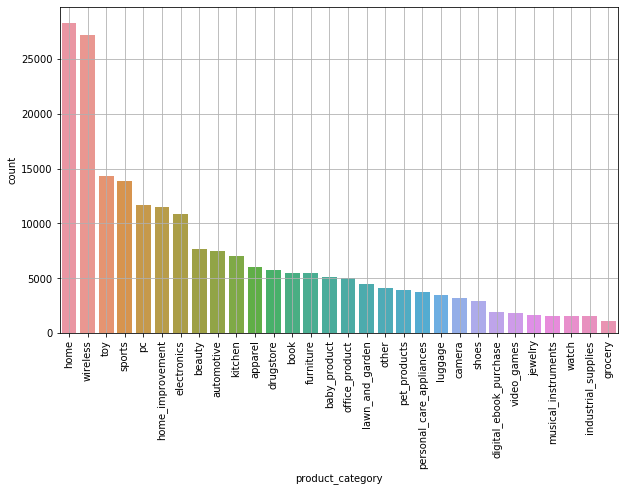

In [13]:
categoria_productos=result['product_category'].value_counts()
print(categoria_productos)
plt.figure(figsize=(10,6))
#tipologia.hist()
plt.xticks(rotation=90)
categoria_productos=result['product_category'].value_counts()
categoria_productos
#sns.set_theme(style="darkgrid")
ax = sns.countplot(x='product_category', data=result,order=result['product_category'].value_counts().index)#,ascending=True)
plt.grid()

In [14]:
lista_productos=categoria_productos.to_list()
categoria_productos.to_frame()

,product_category
home,28328
wireless,27208
toy,14328
sports,13856
pc,11720
home_improvement,11468
electronics,10899
beauty,7707
automotive,7495
kitchen,7028


In [15]:
lista_de_productos=result.product_category
lista_de_productos.to_list()
lista_de_productos=lista_de_productos.unique()
lista_de_productos=['wireless', 'apparel', 'sports', 'home_improvement', 'beauty',
       'home', 'baby_product', 'pc', 'toy', 'book',
       'personal_care_appliances', 'kitchen', 'lawn_and_garden',
       'pet_products', 'drugstore', 'office_product', 'furniture',
       'electronics', 'automotive', 'shoes', 'jewelry', 'luggage',
       'camera', 'industrial_supplies', 'other', 'musical_instruments',
       'grocery', 'digital_ebook_purchase', 'video_games', 'watch']
len(lista_de_productos)

30

### In the following cell, we create a graphic with the stars distributions.
#### It makes me feel a little bit unconfortable, because, how it could be the same ditribution for all of them?

Cantidad de estrellas: 5
[1 2 3 4 5]


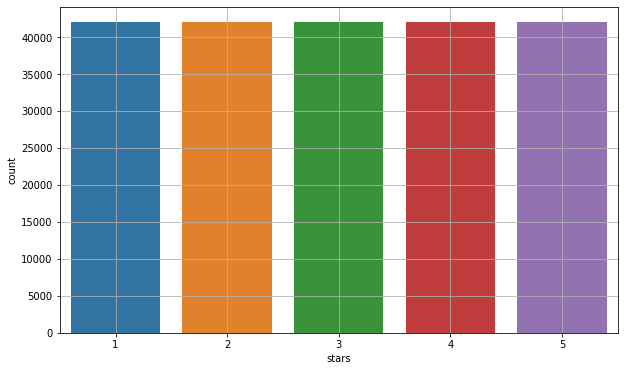

In [16]:
#Cuantos estrellas hay en este dataset?
estrellas=result['stars']

print("Cantidad de estrellas:", len(result['stars'].unique()))
print(result['stars'].unique())
plt.figure(figsize=(10,6))
#tipologia.hist()
plt.xticks(rotation=0)
cuento_estrellas=result['stars'].value_counts()
cuento_estrellas
#sns.set_theme(style="darkgrid")
ax = sns.countplot(x='stars', data=result)
plt.grid()

### In the next cell we are creating a identify number for each product category

In [17]:
# converting type of columns to 'category'
result['product_category']=result['product_category'].astype('category')
# Assigning numerical values and storing in another column
result['Cat_product_category'] = result['product_category'].cat.codes
result.sort_values(by=['Cat_product_category'])
result.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,Cat_product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless,29
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel,0


In [18]:
data.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel


In [19]:
# converting type of columns to 'category'
data['product_category']=data['product_category'].astype('category')
# Assigning numerical values and storing in another column
data['Cat_product_category'] = data['product_category'].cat.codes
data.sort_values(by=['Cat_product_category'])
# converting type of columns to 'category'
data_test['product_category']=data_test['product_category'].astype('category')
# Assigning numerical values and storing in another column
data_test['Cat_product_category'] = data_test['product_category'].cat.codes
data_test.sort_values(by=['Cat_product_category'])
# converting type of columns to 'category'
data_train['product_category']=data_train['product_category'].astype('category')
# Assigning numerical values and storing in another column
data_train['Cat_product_category'] = data_train['product_category'].cat.codes
data_train.sort_values(by=['Cat_product_category'])

data.head(2)
data_test.head(2)
data_train.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,Cat_product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics,8
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics,8


### Filtering by product type
> In this loop, we first create an empty list, and then add each filter, and in the same loop, we give the dataset format to each mask.

In [20]:
probando=[]
lista_de_productos 
for i in lista_de_productos:
    j=((result.product_category==i)&result.stars==1)|((result.product_category==i)&(result.stars==2))|((result.product_category==i)&(result.stars==3))|((result.product_category==i)&(result.stars==4))|((result.product_category==i)&(result.stars==5)).copy()     
    k=result[j].copy()
    probando.append(k)

#### We check that the list has all 30 elements

In [21]:
len(probando)

30

### Graphics of all categories
> In this lists of graphics, i im explaining the distribution of de category scores. This can be useful for analize why diferents categories has more or less satisfactied with the product.

> After seeing that, i am going to do a chart with the most frecuent words in the reviews of ONE star

C:\Users\Alfredo\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


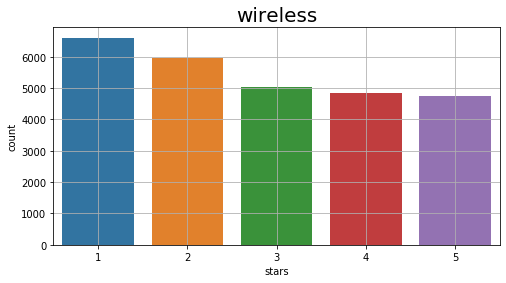

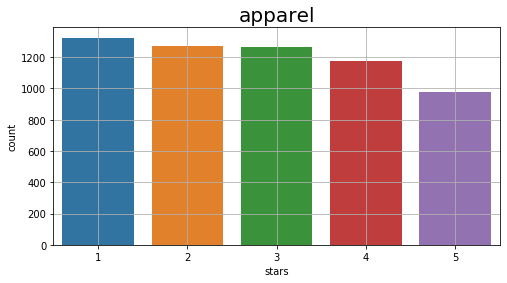

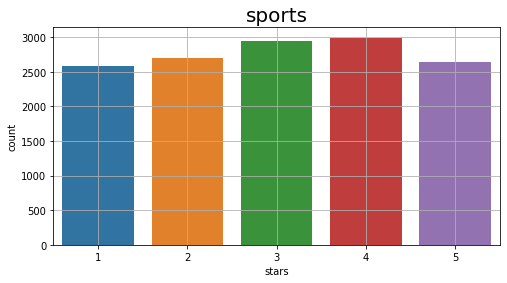

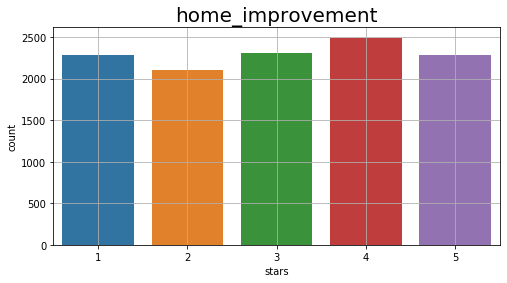

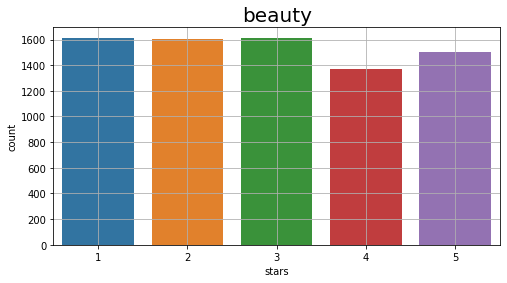

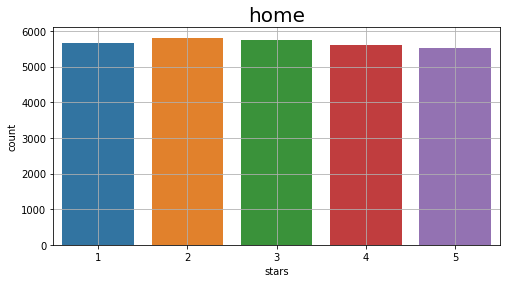

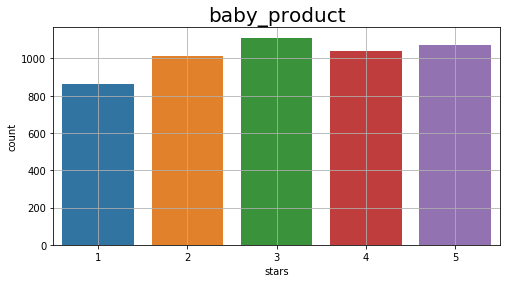

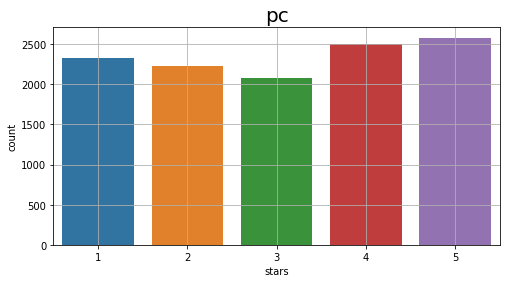

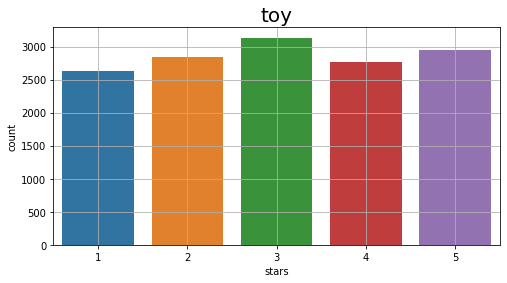

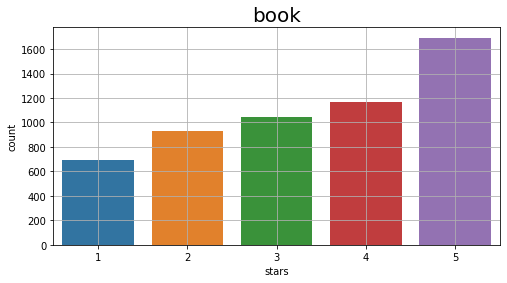

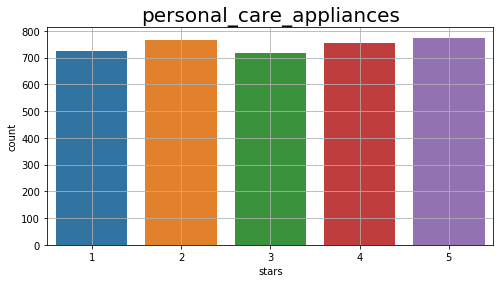

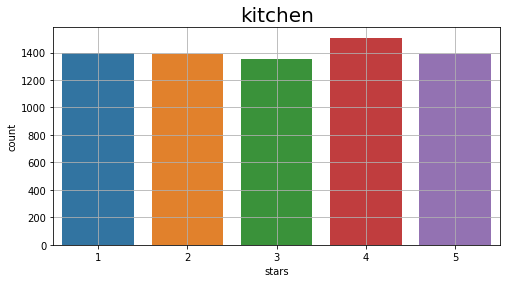

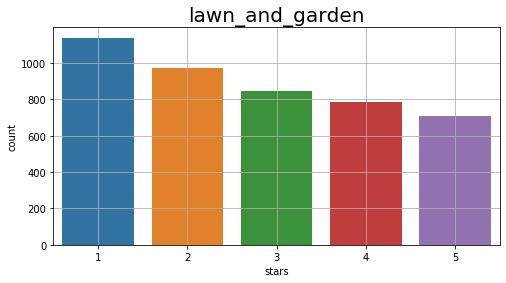

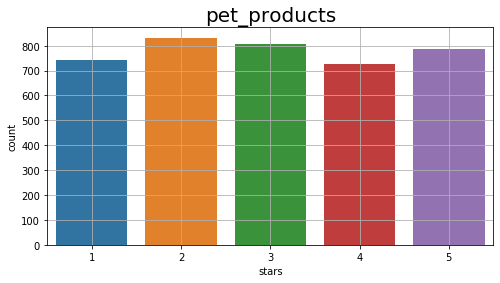

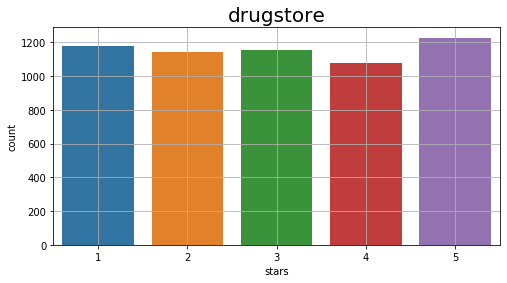

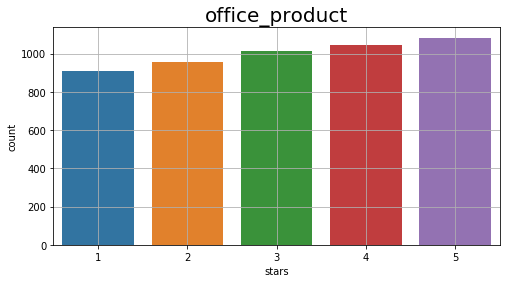

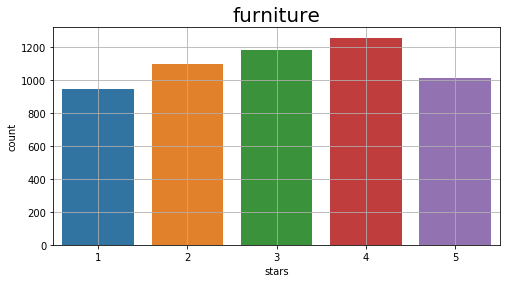

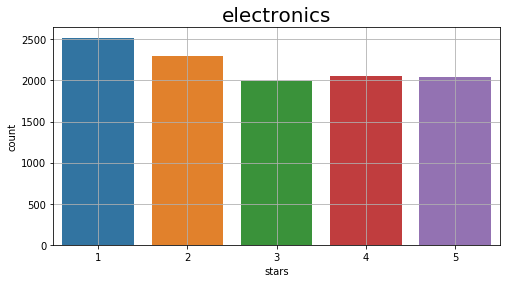

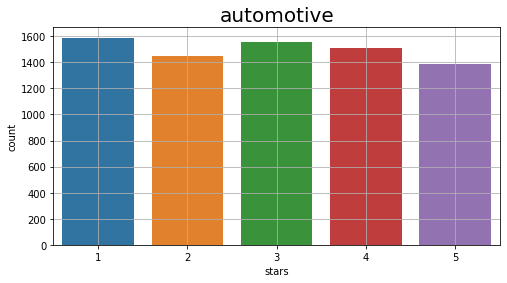

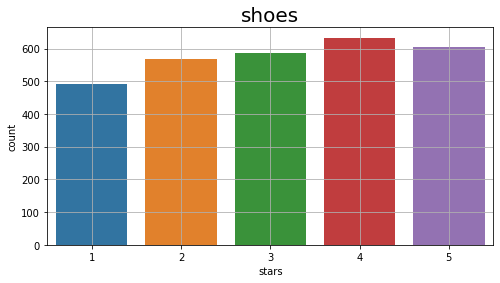

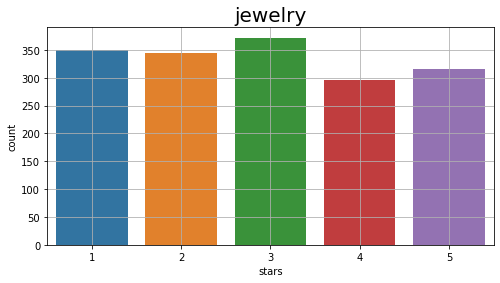

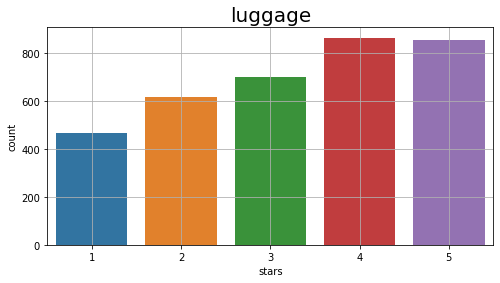

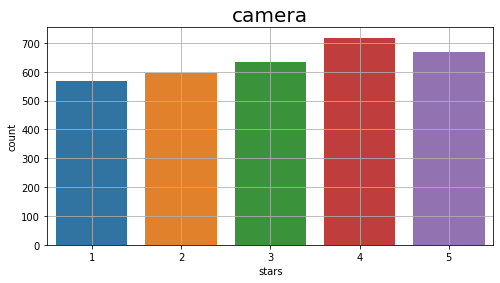

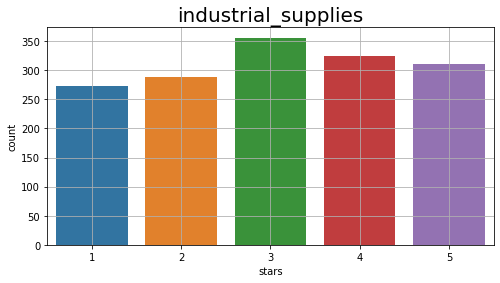

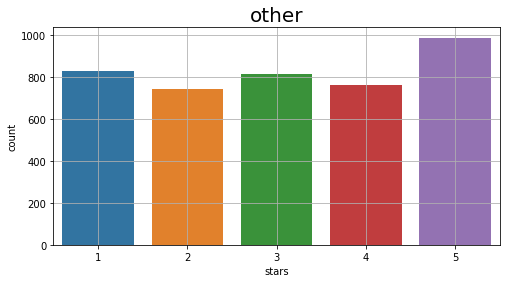

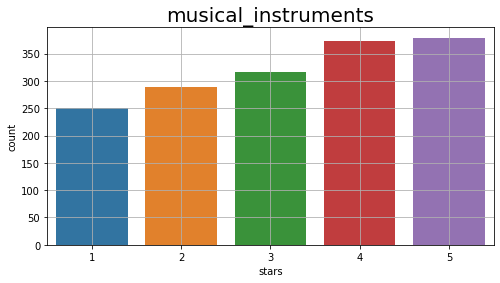

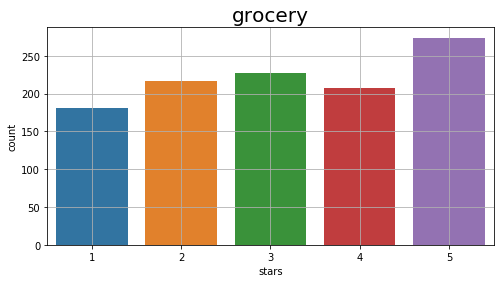

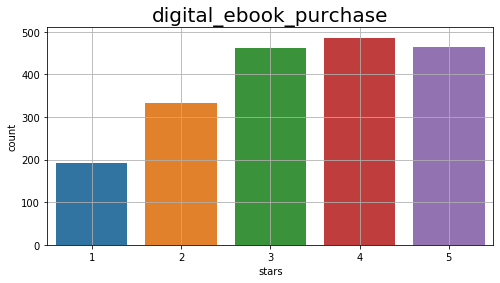

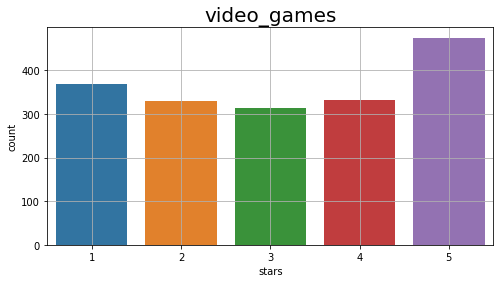

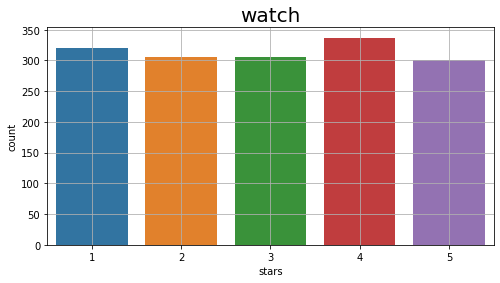

In [22]:
class Contador(object):
  def __init__(self, inicial=-1):
    self.numero = inicial
  def siguiente(self):
    self.numero += 1
    return self.numero
cuenta = Contador()
for t in probando:
    estrellas= t["stars"]
    len(t['stars'].unique())
    t['stars'].unique()
    plt.figure(figsize=(8,4))
    plt.xticks(rotation=0)
    cuento_estrellas=t['stars'].value_counts()
    cuento_estrellas
    ax = sns.countplot(x='stars', data=t)
    plt.grid()
    plt.title(lista_de_productos[cuenta.siguiente()],fontsize=20)

### Análisis de gráficos:
> Vemos que las categorías `wireless`, `lawn_and_garden`, `electronics` tienen un sesgo en la acumulación de estrellas. De todas las críticas que tiene, las que más se acumulan son las de 1 y 2 estrellas.

> La categoría `book`, está muy bien punteada. Tiene muchas más puntuaciones de 5 estrellas que el resto. De hecho, las puntuaciones van claramente ascendiendo del 1 al 5 con un gran ascenso en 5. 

> Una categoría muy bien punteada es `digital_ebook_purchase`. 

> Otras categorías con buenos puntajes son `lugagge` y `musical_instrumens`. Las puntuaciones van en ascenso del 1 al 5. Acumulándose por igual en 4 y 5.

> Dentro de la categoría `video_games`, el gráfico forma una especie de parábola, es decir, que en donde más se acumulan crítcas es en los extremos y en las categorías del medio (2,3 y 4) se ven aplanadas. Tiene un leve sesgo en las puntuaciones de 5 estrellas. 

> El resto de elementos de la lista;
* ['apparel', 'sports', 'home_improvement', 'beauty', 'home', 'baby_product', 'pc', 'toy', 'personal_care_appliances', 'kitchen', 'pet_products', 'drugstore', 'office_product', 'furniture', 'automotive', 'shoes', 'jewelry', 'camera', 'industrial_supplies', 'other', 'grocery', 'watch'], mantienen un comportamiento equitativo entre las diferentes puntuaciones.

In [23]:
#data.to_excel(r'C:\Users\Alfredo\Bitácoras\example.xlsx', sheet_name='example')

In [24]:
# lista_de_productos (es la lista que contiene a las categorias)
# probando (es la lista que contiene a los dataframes) 

### Tokenizing the dataset according to One star
> I want to see, what words were the most used in the reviews of a star. 
> We are a going to use, the dataset "data". Because, the "result" dataset is to heavy.

> I also want to see, wich words are the most used un the reviews for home.

### La cantidad de palabaras usadas por reseña, influye en la calificación?

In [25]:
## ESTE DATA SET ESTÁ HECHO SOLAMENTE CON EL DATASET DATA
malisimo_todo_prueba=(result.stars==1)
malisimo_todo_prueba=result[malisimo_todo_prueba].copy()
malo_todo_prueba=(result.stars==2)
malo_todo_prueba=result[malo_todo_prueba].copy()
bueno_todo_prueba=(result.stars==3)
bueno_todo_prueba=result[bueno_todo_prueba].copy()
Muy_bueno_todo_prueba=(result.stars==4)
Muy_bueno_todo_prueba=result[Muy_bueno_todo_prueba].copy()
Perfecto_todo_prueba=(result.stars==5)
Perfecto_todo_prueba=result[Perfecto_todo_prueba].copy()
print(malisimo_todo_prueba.shape)
print(malo_todo_prueba.shape)
print(bueno_todo_prueba.shape)
print(Muy_bueno_todo_prueba.shape)
print(Perfecto_todo_prueba.shape)
#malo=((result.product_category==i)&(result.stars==1))
#malo2=[]
#for i in lista_de_productos:
#    j=((data.product_category==i)&(data.stars==1)).copy()
#    k=data[j].copy()
#    malo2.append(k)

(42000, 9)
(42000, 9)
(42000, 9)
(42000, 9)
(42000, 9)


In [26]:
cantidad_criticasmalisimas=[]
for i in malisimo_todo_prueba.review_body:
    criticas=i
    cantidad_criticasmalisimas.append(criticas)
cantidad_criticasmalas=[]
for i in malo_todo_prueba.review_body:
    criticas=i
    cantidad_criticasmalas.append(criticas)
cantidad_criticasbuenas=[]    
for i in bueno_todo_prueba.review_body:
    criticas=i
    cantidad_criticasbuenas.append(criticas)
cantidad_criticasMuybuenas=[]
for i in Muy_bueno_todo_prueba.review_body:
    criticas=i
    cantidad_criticasMuybuenas.append(criticas)    
cantidad_criticasPerfectas=[]
for i in Perfecto_todo_prueba.review_body:
    criticas=i
    cantidad_criticasPerfectas.append(criticas)    
cantidad_criticasmalisimas_tokenizadas=[]
for i in cantidad_criticasmalisimas:## Osea la lista entera de criticas
    j=nltk.tokenize.word_tokenize(i)
    cantidad_criticasmalisimas_tokenizadas.append(j)
cantidad_criticasmalas_tokenizadas=[]
for i in cantidad_criticasmalas:## Osea la lista entera de criticas
    j=nltk.tokenize.word_tokenize(i)
    cantidad_criticasmalas_tokenizadas.append(j)
cantidad_criticasbuenas_tokenizadas=[]
for i in cantidad_criticasbuenas:## Osea la lista entera de criticas
    j=nltk.tokenize.word_tokenize(i)
    cantidad_criticasbuenas_tokenizadas.append(j)
cantidad_criticasMuybuenas_tokenizadas=[]
for i in cantidad_criticasMuybuenas:## Osea la lista entera de criticas
    j=nltk.tokenize.word_tokenize(i)
    cantidad_criticasMuybuenas_tokenizadas.append(j)
cantidad_criticasPerfectas_tokenizadas=[]
for i in cantidad_criticasPerfectas:## Osea la lista entera de criticas
    j=nltk.tokenize.word_tokenize(i)
    cantidad_criticasPerfectas_tokenizadas.append(j)
criticasmalisimas_data_tokenizadas_chain = list(itertools.chain(*cantidad_criticasmalisimas_tokenizadas))
criticasmalas_data_tokenizadas_chain = list(itertools.chain(*cantidad_criticasmalas_tokenizadas))
criticasbuenas_data_tokenizadas_chain = list(itertools.chain(*cantidad_criticasbuenas_tokenizadas))
criticasMuybuenas_data_tokenizadas_chain = list(itertools.chain(*cantidad_criticasMuybuenas_tokenizadas))
criticasPerfectas_data_tokenizadas_chain = list(itertools.chain(*cantidad_criticasPerfectas_tokenizadas))

print("Cantidad de palabras en criticas malisimas: ",len(criticasmalisimas_data_tokenizadas_chain))
print("Cantidad de palabras en criticas malas: ",len(criticasmalas_data_tokenizadas_chain))
print("Cantidad de palabras en criticas buenas: ",len(criticasbuenas_data_tokenizadas_chain))
print("Cantidad de palabras en criticas Muy Buenas: ",len(criticasMuybuenas_data_tokenizadas_chain))
print("Cantidad de palabras en criticas Perfectas: ",len(criticasPerfectas_data_tokenizadas_chain))


Cantidad de palabras en criticas malisimas:  1325111
Cantidad de palabras en criticas malas:  1452134
Cantidad de palabras en criticas buenas:  1337774
Cantidad de palabras en criticas Muy Buenas:  1210119
Cantidad de palabras en criticas Perfectas:  1153607


In [27]:
opinionestotales=(len(criticasmalisimas_data_tokenizadas_chain)+
len(criticasmalas_data_tokenizadas_chain)+
len(criticasbuenas_data_tokenizadas_chain)+
len(criticasMuybuenas_data_tokenizadas_chain)+
len(criticasPerfectas_data_tokenizadas_chain))
opinionestotales

6478745

In [28]:
print("Porcentaje del total criticas malisimas: ",len(criticasmalisimas_data_tokenizadas_chain)/opinionestotales)
print("Porcentaje del total en criticas malas: ",len(criticasmalas_data_tokenizadas_chain)/opinionestotales)
print("Porcentaje del total en criticas buenas: ",len(criticasbuenas_data_tokenizadas_chain)/opinionestotales)
print("Porcentaje del total en criticas Muy Buenas: ",len(criticasMuybuenas_data_tokenizadas_chain)/opinionestotales)
print("Porcentaje del total en criticas Perfectas: ",len(criticasPerfectas_data_tokenizadas_chain)/opinionestotales)

Porcentaje del total criticas malisimas:  0.20453205057460974
Porcentaje del total en criticas malas:  0.2241381625608046
Porcentaje del total en criticas buenas:  0.206486595783597
Porcentaje del total en criticas Muy Buenas:  0.18678293404046617
Porcentaje del total en criticas Perfectas:  0.1780602570405225


### Bajo el calculo realizado, vemos que existe una relación entre la cantidad de palabras con la calificación del producto:
> Para las criticas de 1,2 y 3 estrellas, vemos que los compradores tienden a usar más palabras, esto puede deberse a que explican cuanto les demoro, que es lo que estaba mal, cosas que deben mejorar, entre otras  cosas.

> Mientras que en las críticas de 4 y 5 estrellas, vemos que los compradores usan criticas más cortas. Y esto puede deberse a que simplemente ponen "Era lo que esperaba" ó "Buen producto". Siendo mucho más concretos en el feedback del producto.

In [29]:
## Este es el dataframe que contiene todas las criticas de una estrella
malisimo_todo_prueba.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,Cat_product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless,29
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel,0


In [30]:
malisimo_todo_prueba.shape

(42000, 9)

## Fijarse después si esta celda de acá abajo la borramos.

In [31]:
malisimo_home=((result.product_category=='home')&(result.stars==1))
malisimo_home=result[malisimo_home].copy()
#malo=((result.product_category==i)&(result.stars==1))
malo=[]
for i in lista_de_productos:
    j=((data.product_category==i)&(data.stars==1)).copy()
    k=data[j].copy()
    malo.append(k)

In [32]:
malisimo_home.head(2)
malisimo_home.shape

(5651, 9)

In [33]:
len(malo)
malo[0].shape

(164, 9)

### Want to be sure about the dataset has the correctly stars filter

Cantidad de estrellas: 1
[1]
Cantidad de criticas de una estrella: 1    42000
Name: stars, dtype: int64


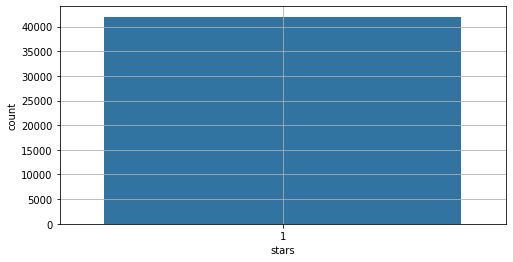

In [34]:
## Probando
estrellas=malisimo_todo_prueba['stars']
print("Cantidad de estrellas:", len(malisimo_todo_prueba['stars'].unique()))
print(malisimo_todo_prueba['stars'].unique())
plt.figure(figsize=(8,4))
#tipologia.hist()
plt.xticks(rotation=0)
cuento_estrellas=malisimo_todo_prueba['stars'].value_counts()
print("Cantidad de criticas de una estrella:",cuento_estrellas)
#sns.set_theme(style="darkgrid")
ax = sns.countplot(x='stars', data=malisimo_todo_prueba)
plt.grid()

In [35]:
criticasmalisimas_prueba=[]
for i in malisimo_todo_prueba.review_body:
    criticas=i
    criticasmalisimas_prueba.append(criticas)

In [36]:
print("La longitud de la lista criticasmalas es: ",len(criticasmalisimas_prueba))

La longitud de la lista criticasmalas es:  42000


In [38]:
## Lista de listas
#criticasmalisimas_prueba_tokenizadas

In [39]:
stop_words=set(stopwords.words("spanish"))

### En la siguiente celda está dividio por las criticas de ''home"

In [ ]:
estrellas=malisimo_home['stars']
print("Cantidad de estrellas:", len(malisimo_home['stars'].unique()))
print(malisimo_home['stars'].unique())
plt.figure(figsize=(8,4))
#tipologia.hist()
plt.xticks(rotation=0)
cuento_estrellas=malisimo_home['stars'].value_counts()
cuento_estrellas
#sns.set_theme(style="darkgrid")
ax = sns.countplot(x='stars', data=malisimo_home)
plt.grid()

In [ ]:
## QUEDA CLARO QUE EL NUMERO DEL INDICE, SERÍA EL NÚMERO DE EL ELEMENTO EN LA LISTA
frame_productos = DataFrame(lista_de_productos,columns=['lista_de_productos'])
frame_productos

### We create a list of lists from home category with reviews of one star 

In [ ]:
criticasmalas=[]
for i in malisimo_home.review_body:
    criticas=i
    criticasmalas.append(criticas)

In [ ]:
print("La longitud de la lista criticasmalas es: ",len(criticasmalas))
## Es decir que hay 30 listas adentro de esa lista, si nosotros llamamos al df criticasmalas[0]
## se imprime el primer dataframe
#len(criticasmalas[0])
#lista_criticas_malas=[]
#for i in criticasmalas:
#    lista=i.tolist()    
#    lista_criticas_malas.append(lista)

### The list "criticasmalas" has in lists the reviews

In [ ]:
## Osea que esta lista de criticas malas, son las criticas malas de Wireless.
## Porque recordar que la posicion uno es del articulo wireless.
## Cada elemento de la lista, es un comentario
#print("La longitud de la lista wireless es: ",len(lista_criticas_malas[0]),"\n",lista_criticas_malas[0])
#criticasmalas

### In the following cell, is the list of bad reviews. What is going to be commented.

In [ ]:
#lista_criticas_malas_cadena

### Tokenizing of list

In [ ]:
criticas_malas_tokenizadas=[]
for i in criticasmalas:## Osea la lista entera de criticas
    j=nltk.tokenize.word_tokenize(i)
    criticas_malas_tokenizadas.append(j)

In [ ]:
len(criticas_malas_tokenizadas)
#criticas_malas_tokenizadas

### We convert the lists inside the list to a string

In [ ]:
palabras_criticas_malas_tokenizadas = list(itertools.chain(*criticas_malas_tokenizadas))

In [ ]:
#lista_criticas_malas_cadena ## En formato de lista

### If we want to see the first reviews of the list, i mean the reviews of Wireless. The only thing we have to do is, put [0] next to the list. 
### The cell is left commented

In [ ]:
## Recordar que la lista de wireless tiene 5651 comentarios, entonces:
print(palabras_criticas_malas_tokenizadas[0]) ## Este sería el primer comentario de la lista de comentarios

### We see stop words of Spanish

In [216]:
stop_words=set(stopwords.words("spanish"))
#stop_words

#### Agrego al stop words, elementos que se repiten mucho en las criticas

In [301]:
stop_words.add('.')
stop_words.add(',')
stop_words.add('En')
stop_words.add('La')
stop_words.add('El')
stop_words.add('La')
stop_words.add('Es')
stop_words.add('Lo')
stop_words.add('Me')
stop_words.add('Se')
stop_words.add(')')
stop_words.add('(')
stop_words.add('por')

In [303]:
#stop_words

In [ ]:
#palabras_criticas_malas_tokenizadas

In [ ]:
print("Cantidad de elementos dentro de la lista: ",len(palabras_criticas_malas_tokenizadas))
#criticas_malas_tokenizadas

In [ ]:
filtered_sentence_malisimo=[]
for w in palabras_criticas_malas_tokenizadas:
    if w not in stop_words:
        filtered_sentence_malisimo.append(w)
#filtered_sentence_malisimo

### After filtering by "stop words", the length of the list is 98752, much more shorter than before.

In [ ]:
len(filtered_sentence_malisimo)

In [ ]:
df_de_palabras_una_estrella = DataFrame(filtered_sentence_malisimo,columns=['Palabras'])
df_de_palabras_una_estrella

In [ ]:
df_de_palabras_una_estrella=df_de_palabras_una_estrella.groupby(["Palabras"]).size().reset_index(name="Frecuencia")

In [ ]:
df_de_palabras_una_estrella.sort_values(by="Frecuencia",ascending=False).head(20)

## Stemming

In [ ]:
ps=PorterStemmer()
# la lista es: filtered_sentence_malisimo
filtered_sentence_malisimo_stemmizado=[]
for w in filtered_sentence_malisimo:
    j=ps.stem(w)
    filtered_sentence_malisimo_stemmizado.append(j)

In [ ]:
#filtered_sentence_malisimo_stemmizado

In [ ]:
filtered_sentence_malisimo_stemmizado = DataFrame(filtered_sentence_malisimo_stemmizado,columns=['Palabras'])
filtered_sentence_malisimo_stemmizado

In [ ]:
df_filtered_sentence_malisimo_stemmizado=filtered_sentence_malisimo_stemmizado.groupby(["Palabras"]).size().reset_index(name="Frecuencia")

In [ ]:
df_filtered_sentence_malisimo_stemmizado=df_filtered_sentence_malisimo_stemmizado.sort_values(by="Frecuencia",ascending=False)

In [ ]:
df_filtered_sentence_malisimo_stemmizado.head(45)

### Purging the words the stop words did not identify

In [ ]:
df_filtered_sentence_malisimo_stemmizado=df_filtered_sentence_malisimo_stemmizado.drop([24,10,320,343,3247,322,345,349,373,5752,5556,162],axis=0)

In [ ]:
df_filtered_sentence_malisimo_stemmizado.head(30)

## Que palabras fueron las más usadas para las críticas de una estrella?

In [ ]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_filtered_sentence_malisimo_stemmizado.iloc[:30].Palabras, y = df_filtered_sentence_malisimo_stemmizado.iloc[:30].Frecuencia)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.grid()
plt.title('Palabras más usadas para reviews de 1 estrella',fontsize=20)
plt.show()

## Conclusiones:
### After the exploratory analysis, we can see the most frecuent  words in the chart. 
> Obviusly the expression "No", is the first word in the graph. 
 
> Then, another thing interesting is the exclamation simbol "!", surely the people use it to enphasize angry.

> One thing that i did not expect, are the "..." suspension points. I think people use it to explain disappointment.

> En el grafico aparece la palabra "si", pero si uno la mira fuera de contexto puede parecer positivo. 
> Pero analizando el contexto del análisis, que son las reseñas negativas. La palabra si, funciona como condicionante."

> Ejemplo: "Si me hubieran avisado que era así, no lo compraba","Si tenía más fotos no lo compraba"

> Otra cosa, es que el adjetivo bien es positivo, sin embargo está precedido por palabras negativas, por lo que hacen mutar su significado.

### Vemos la distribución de palabras para las criticas de 1 estrella.

In [305]:
malisimo_10mil=((pc30.stars==1))
malisimo_10mil=pc30[malisimo_10mil].copy()
malisimo_10mil.shape

(12600, 9)

Cantidad de estrellas: 1
[1]
1    12600
Name: stars, dtype: int64


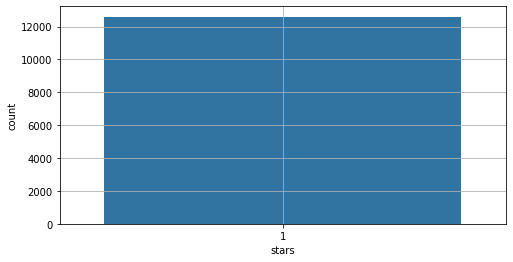

In [317]:
estrellas=malisimo_10mil['stars']
print("Cantidad de estrellas:", len(malisimo_10mil['stars'].unique()))
print(malisimo_10mil['stars'].unique())
plt.figure(figsize=(8,4))
#tipologia.hist()
plt.xticks(rotation=0)
cuento_estrellas=malisimo_10mil['stars'].value_counts()
print(cuento_estrellas)
#sns.set_theme(style="darkgrid")
ax = sns.countplot(x='stars', data=malisimo_10mil)
plt.grid()

In [316]:
malisimo_criticas=[]
for i in malisimo_10mil.review_body:
    criticas=i
    malisimo_criticas.append(criticas)
#malisimo_criticas #(es la lista con todas las reviews)

In [318]:
criticas_malisimo10mil_tokenizadas=[]
for i in malisimo_criticas:## Osea la lista entera de criticas
    j=nltk.tokenize.word_tokenize(i)
    criticas_malisimo10mil_tokenizadas.append(j) 

In [319]:
palabras_criticas_malisimo10mil_tokenizadas = list(itertools.chain(*criticas_malisimo10mil_tokenizadas))

In [320]:
len(palabras_criticas_malisimo10mil_tokenizadas)

392980

In [321]:
filtered_sentence_malisimo10mil=[]
for w in palabras_criticas_malisimo10mil_tokenizadas:
    if w not in stop_words:
        filtered_sentence_malisimo10mil.append(w)

In [323]:
len(filtered_sentence_malisimo10mil)

189728

In [324]:
ps=PorterStemmer()
# la lista es: filtered_sentence_malisimo
filtered_sentence_malisimo10mil_stemmizado=[]
for w in filtered_sentence_malisimo10mil:
    j=ps.stem(w)
    filtered_sentence_malisimo10mil_stemmizado.append(j)

In [325]:
df_de_palabras_una_estrellas = DataFrame(filtered_sentence_malisimo10mil_stemmizado,columns=['Palabras'])
df_de_palabras_una_estrellas =df_de_palabras_una_estrellas.groupby(["Palabras"]).size().reset_index(name="Frecuencia") 
df_de_palabras_una_estrellas =df_de_palabras_una_estrellas.sort_values(by="Frecuencia",ascending=False)
df_de_palabras_una_estrellas.head(30)

,Palabras,Frecuencia
723,No,4298
11837,producto,2399
53,...,1855
0,!,1791
2394,bien,1383
2748,calidad,1280
13589,si,1246
5471,do,1070
5616,día,1070
9021,llegado,1002


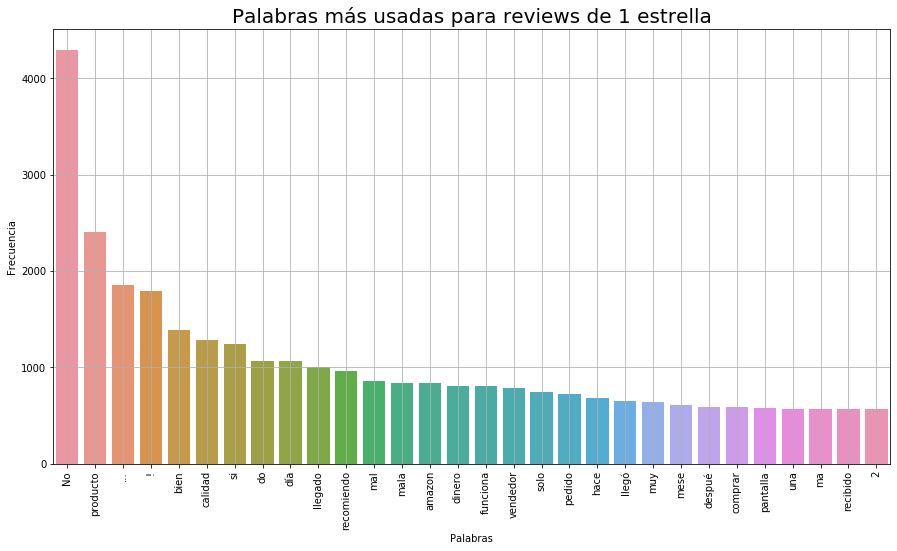

In [326]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_de_palabras_una_estrellas.iloc[:30].Palabras, y = df_de_palabras_una_estrellas.iloc[:30].Frecuencia)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.grid()
plt.title('Palabras más usadas para reviews de 1 estrella',fontsize=20)
plt.show()

### Vemos la distribución de palabras para las criticas de 2 estrellas.

In [290]:
malo_10mil=((pc30.stars==2))
malo_10mil=pc30[malo_10mil].copy()
malo_10mil.shape

(12600, 9)

Cantidad de estrellas: 1
[2]
2    12600
Name: stars, dtype: int64


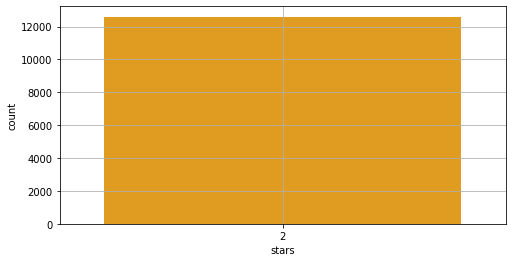

In [291]:
estrellas=malo_10mil['stars']
print("Cantidad de estrellas:", len(malo_10mil['stars'].unique()))
print(malo_10mil['stars'].unique())
plt.figure(figsize=(8,4))
#tipologia.hist()
plt.xticks(rotation=0)
cuento_estrellas=malo_10mil['stars'].value_counts()
print(cuento_estrellas)
#sns.set_theme(style="darkgrid")
ax = sns.countplot(x='stars', data=malo_10mil,palette=["orange"])
plt.grid()

In [306]:
malas_criticas=[]
for i in malo_10mil.review_body:
    criticas=i
    malas_criticas.append(criticas)
#malas_criticas #(es la lista con todas las reviews)

In [307]:
criticas_malas10mil_tokenizadas=[]
for i in malas_criticas:## Osea la lista entera de criticas
    j=nltk.tokenize.word_tokenize(i)
    criticas_malas10mil_tokenizadas.append(j) 

In [308]:
palabras_criticas_malas10mil_tokenizadas = list(itertools.chain(*criticas_malas10mil_tokenizadas))

In [309]:
len(palabras_criticas_malas10mil_tokenizadas)

436389

In [310]:
filtered_sentence_malas10mil=[]
for w in palabras_criticas_malas10mil_tokenizadas:
    if w not in stop_words:
        filtered_sentence_malas10mil.append(w)

In [322]:
len(filtered_sentence_malas10mil)

203771

In [312]:
ps=PorterStemmer()
# la lista es: filtered_sentence_malisimo
filtered_sentence_malas10mil_stemmizado=[]
for w in filtered_sentence_malas10mil:
    j=ps.stem(w)
    filtered_sentence_malas10mil_stemmizado.append(j)

In [313]:
df_de_palabras_dos_estrellas = DataFrame(filtered_sentence_malas10mil_stemmizado,columns=['Palabras'])
df_de_palabras_dos_estrellas =df_de_palabras_dos_estrellas.groupby(["Palabras"]).size().reset_index(name="Frecuencia") 
df_de_palabras_dos_estrellas =df_de_palabras_dos_estrellas.sort_values(by="Frecuencia",ascending=False)
df_de_palabras_dos_estrellas.head(30)

,Palabras,Frecuencia
740,No,3073
2637,bien,3033
3049,calidad,1833
46,...,1820
14573,si,1712
12668,producto,1494
12457,precio,1041
5924,do,993
2552,bastant,859
2851,buena,812


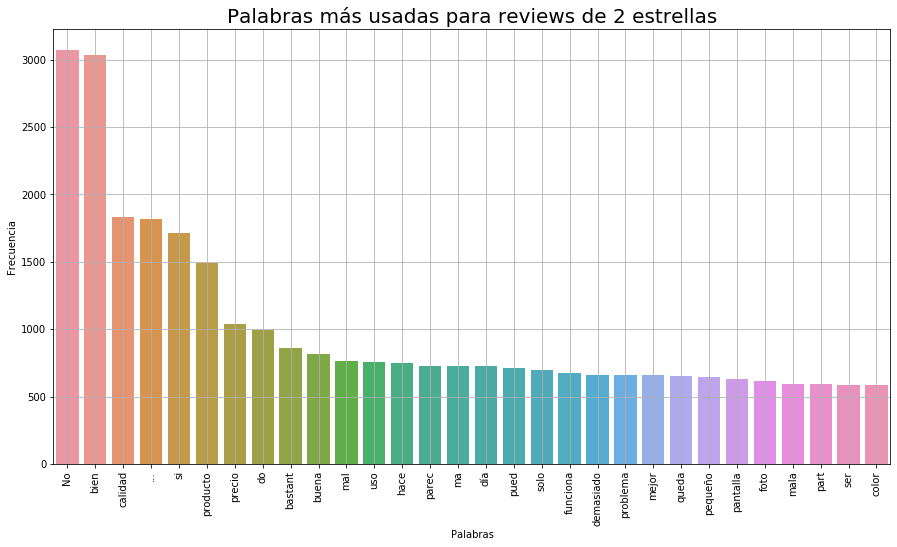

In [314]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_de_palabras_dos_estrellas.iloc[:30].Palabras, y = df_de_palabras_dos_estrellas.iloc[:30].Frecuencia)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.grid()
plt.title('Palabras más usadas para reviews de 2 estrellas',fontsize=20)
plt.show()

### Vemos la distribución de palabras para las criticas de 3 estrellas.

In [280]:
bueno_10mil=((pc30.stars==3))
bueno_10mil=pc30[bueno_10mil].copy()
bueno_10mil.shape

(12600, 9)

Cantidad de estrellas: 1
[3]
3    12600
Name: stars, dtype: int64


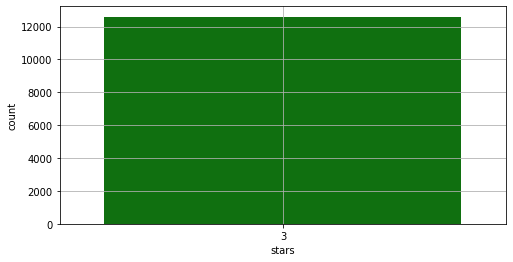

In [262]:
estrellas=bueno_10mil['stars']
print("Cantidad de estrellas:", len(bueno_10mil['stars'].unique()))
print(bueno_10mil['stars'].unique())
plt.figure(figsize=(8,4))
#tipologia.hist()
plt.xticks(rotation=0)
cuento_estrellas=bueno_10mil['stars'].value_counts()
print(cuento_estrellas)
#sns.set_theme(style="darkgrid")
ax = sns.countplot(x='stars', data=bueno_10mil,palette=["green"])
plt.grid()

In [263]:
buenas_criticas=[]
for i in bueno_10mil.review_body:
    criticas=i
    buenas_criticas.append(criticas)
#buenas_criticas #(es la lista con todas las reviews)

In [264]:
criticas_buenas10mil_tokenizadas=[]
for i in buenas_criticas:## Osea la lista entera de criticas
    j=nltk.tokenize.word_tokenize(i)
    criticas_buenas10mil_tokenizadas.append(j) 

In [265]:
palabras_criticas_buenas10mil_tokenizadas = list(itertools.chain(*criticas_buenas10mil_tokenizadas))

In [266]:
len(palabras_criticas_buenas10mil_tokenizadas)

400549

In [267]:
filtered_sentence_bueno10mil=[]
for w in palabras_criticas_buenas10mil_tokenizadas:
    if w not in stop_words:
        filtered_sentence_bueno10mil.append(w)

In [268]:
len(filtered_sentence_bueno10mil)

187388

In [269]:
ps=PorterStemmer()
# la lista es: filtered_sentence_malisimo
filtered_sentence_bueno10mil_stemmizado=[]
for w in filtered_sentence_bueno10mil:
    j=ps.stem(w)
    filtered_sentence_bueno10mil_stemmizado.append(j)

In [270]:
df_de_palabras_tres_estrellas = DataFrame(filtered_sentence_bueno10mil_stemmizado,columns=['Palabras'])
df_de_palabras_tres_estrellas=df_de_palabras_tres_estrellas.groupby(["Palabras"]).size().reset_index(name="Frecuencia") 
df_de_palabras_tres_estrellas=df_de_palabras_tres_estrellas.sort_values(by="Frecuencia",ascending=False)
df_de_palabras_tres_estrellas.head(30)

,Palabras,Frecuencia
2490,bien,4345
655,No,1855
2917,calidad,1753
13916,si,1689
11949,precio,1640
51,...,1442
12141,producto,1255
2726,buena,1130
2406,bastant,1092
2182,aunqu,922


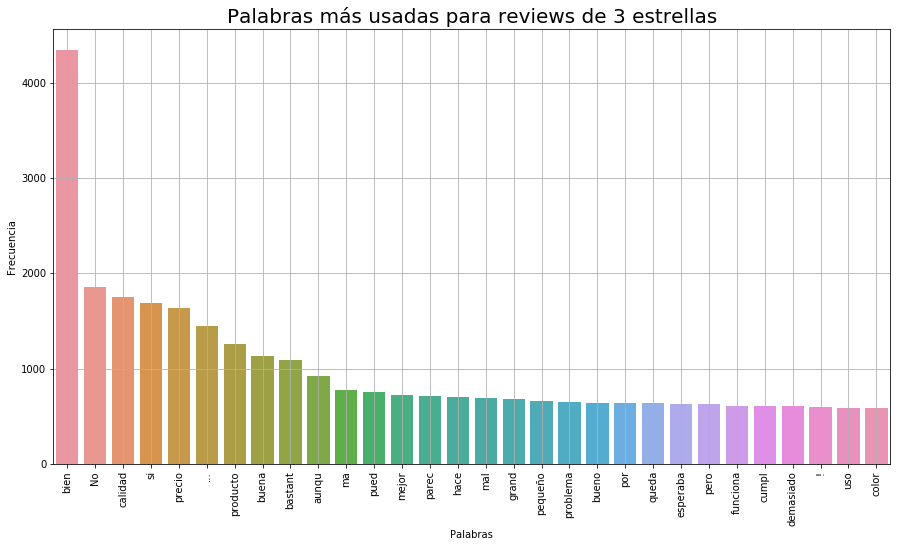

In [272]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_de_palabras_tres_estrellas.iloc[:30].Palabras, y = df_de_palabras_tres_estrellas.iloc[:30].Frecuencia)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.grid()
plt.title('Palabras más usadas para reviews de 3 estrellas',fontsize=20)
plt.show()

### Ahora queremos ver la distribución de palabras para las criticas de 4 estrellas.

In [169]:
Muy_bueno_10mil=((pc30.stars==4))
Muy_bueno_10mil=pc30[Muy_bueno_10mil].copy()
Muy_bueno_10mil.shape

(12600, 9)

In [223]:
muybuenas_criticas=[]
for i in Muy_bueno_10mil.review_body:
    criticas=i
    muybuenas_criticas.append(criticas)
#muybuenas_criticas (es la lista con todas las reviews)

Cantidad de estrellas: 1
[4]
4    12600
Name: stars, dtype: int64


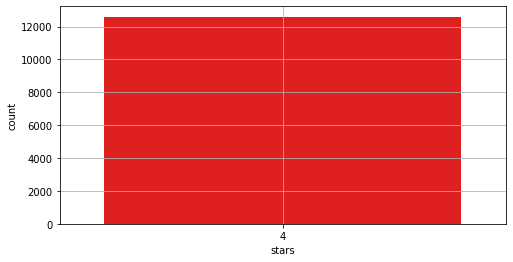

In [170]:
estrellas=Muy_bueno_10mil['stars']
print("Cantidad de estrellas:", len(Muy_bueno_10mil['stars'].unique()))
print(Muy_bueno_10mil['stars'].unique())
plt.figure(figsize=(8,4))
#tipologia.hist()
plt.xticks(rotation=0)
cuento_estrellas=Muy_bueno_10mil['stars'].value_counts()
print(cuento_estrellas)
#sns.set_theme(style="darkgrid")
ax = sns.countplot(x='stars', data=Muy_bueno_10mil,palette=["red"])
plt.grid()

In [171]:
muybuenas_criticas=[]
for i in Muy_bueno_10mil.review_body:
    criticas=i
    muybuenas_criticas.append(criticas)
#muybuenas_criticas (es la lista con todas las reviews)

In [172]:
criticas_muybuenas10mil_tokenizadas=[]
for i in muybuenas_criticas:## Osea la lista entera de criticas
    j=nltk.tokenize.word_tokenize(i)
    criticas_muybuenas10mil_tokenizadas.append(j)    

In [173]:
palabras_criticas_muybuenas10mil_tokenizadas = list(itertools.chain(*criticas_muybuenas10mil_tokenizadas))

In [175]:
filtered_sentence_muybueno10mil=[]
for w in palabras_criticas_muybuenas10mil_tokenizadas:
    if w not in stop_words:
        filtered_sentence_muybueno10mil.append(w)

In [176]:
len(filtered_sentence_muybueno10mil)

172425

In [179]:
ps=PorterStemmer()
# la lista es: filtered_sentence_malisimo
filtered_sentence_muybueno10mil_stemmizado=[]
for w in filtered_sentence_muybueno10mil:
    j=ps.stem(w)
    filtered_sentence_muybueno10mil_stemmizado.append(j)

In [181]:
df_de_palabras_cuatro_estrellas = DataFrame(filtered_sentence_muybueno10mil_stemmizado,columns=['Palabras'])
df_de_palabras_cuatro_estrellas=df_de_palabras_cuatro_estrellas.groupby(["Palabras"]).size().reset_index(name="Frecuencia") 
df_de_palabras_cuatro_estrellas=df_de_palabras_cuatro_estrellas.sort_values(by="Frecuencia",ascending=False)
df_de_palabras_cuatro_estrellas.head(30)

,Palabras,Frecuencia
2317,bien,4428
2707,calidad,2133
2528,buena,2132
11163,precio,2000
11382,producto,1409
2526,buen,1241
2233,bastant,1159
13009,si,1150
9593,muy,1014
4219,cumpl,942


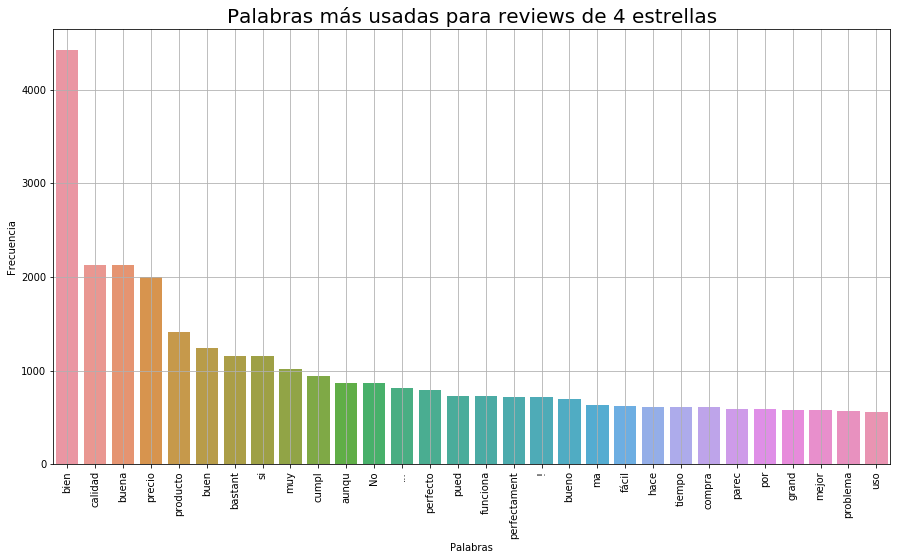

In [183]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_de_palabras_cuatro_estrellas.iloc[:30].Palabras, y = df_de_palabras_cuatro_estrellas.iloc[:30].Frecuencia)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.grid()
plt.title('Palabras más usadas para reviews de 4 estrellas',fontsize=20)
plt.show()

### Ahora queremos ver la distribución de palabras para las criticas de 5 estrellas, para la categoría "home"

In [184]:
perfecto_10mil=((pc30.stars==5))
perfecto_10mil=pc30[perfecto_10mil].copy()
perfecto_10mil.shape

(12600, 9)

Cantidad de estrellas: 1
[5]
5    12600
Name: stars, dtype: int64


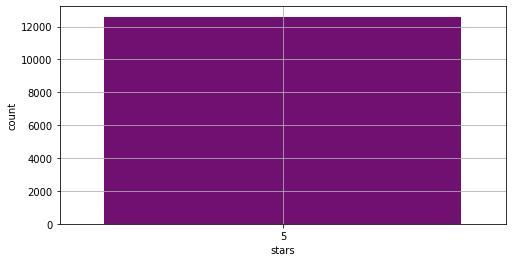

In [277]:
estrellas=perfecto_10mil['stars']
print("Cantidad de estrellas:", len(perfecto_10mil['stars'].unique()))
print(perfecto_10mil['stars'].unique())
plt.figure(figsize=(8,4))
#tipologia.hist()
plt.xticks(rotation=0)
cuento_estrellas=perfecto_10mil['stars'].value_counts()
print(cuento_estrellas)
#sns.set_theme(style="darkgrid")
ax = sns.countplot(x='stars', data=perfecto_10mil,palette=["purple"])
plt.grid()

In [189]:
criticasperfectas_pc30=[]
for i in perfecto_10mil.review_body:
    criticas=i
    criticasperfectas_pc30.append(criticas)

### Esta lista se deja comentada, es la lista de criticas perfectas.

In [191]:
#criticasperfectas_pc30

In [192]:
len(criticasperfectas_pc30)

12600

In [193]:
criticas_perfectas_pc30_tokenizadas=[]
for i in criticasperfectas_pc30:## Osea la lista entera de criticas
    j=nltk.tokenize.word_tokenize(i)
    criticas_perfectas_pc30_tokenizadas.append(j)

In [195]:
#criticas_perfectas_pc30_tokenizadas

In [199]:
palabras_criticas_perfectas_pc30_tokenizadas = list(itertools.chain(*criticas_perfectas_pc30_tokenizadas))

In [200]:
len(palabras_criticas_perfectas_pc30_tokenizadas)

345703

In [202]:
#palabras_criticas_perfectas_pc30_tokenizadas

In [203]:
filtered_sentence_perfecto_pc30=[]
for w in palabras_criticas_perfectas_pc30_tokenizadas:
    if w not in stop_words:
        filtered_sentence_perfecto_pc30.append(w)

In [204]:
len(filtered_sentence_perfecto_pc30)

168762

In [210]:
ps=PorterStemmer()
# la lista es: filtered_sentence_malisimo
filtered_sentence_perfecto_pc30_stemmizado=[]
for w in filtered_sentence_perfecto_pc30:
    j=ps.stem(w)
    filtered_sentence_perfecto_pc30_stemmizado.append(j)

In [211]:
df_de_palabras_cinco_estrellas = DataFrame(filtered_sentence_perfecto_pc30_stemmizado,columns=['Palabras'])
df_de_palabras_cinco_estrellas=df_de_palabras_cinco_estrellas.groupby(["Palabras"]).size().reset_index(name="Frecuencia")
df_de_palabras_cinco_estrellas=df_de_palabras_cinco_estrellas.sort_values(by="Frecuencia",ascending=False)
df_de_palabras_cinco_estrellas[0:30]

,Palabras,Frecuencia
2264,bien,2921
2640,calidad,2423
2472,buena,2321
0,!,1795
9453,muy,1690
10917,precio,1645
10408,perfecto,1612
11132,producto,1489
2471,buen,1283
3454,compra,891


## Que palabras fueron las más usadas para las críticas de 5 estrellas?

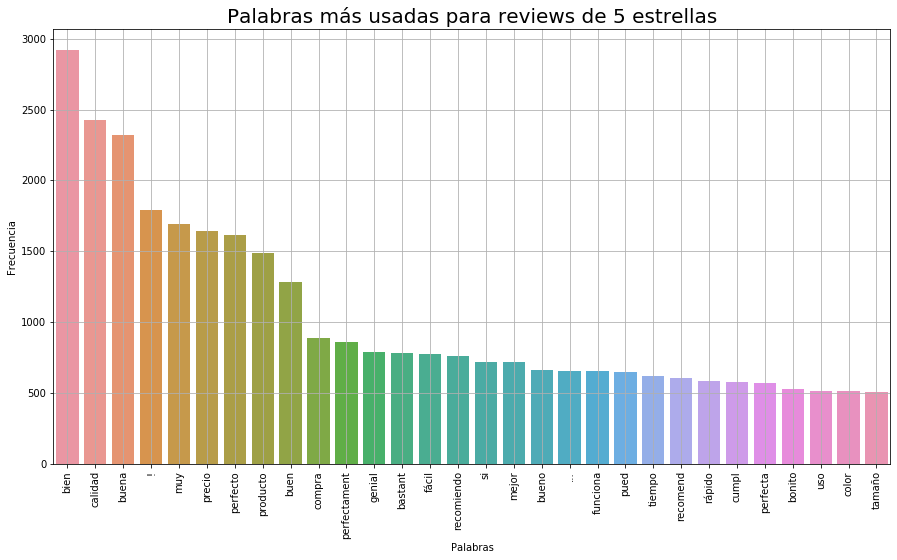

In [212]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_de_palabras_cinco_estrellas.iloc[:30].Palabras, y = df_de_palabras_cinco_estrellas.iloc[:30].Frecuencia)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.grid()
plt.title('Palabras más usadas para reviews de 5 estrellas',fontsize=20)
plt.show()

## Conclusiones:
### Análisis del gráfico anterior:
> Vemos que la palabras más usadas son: "bien", "buena", "calidad", "perfecto", "precio". lo que es lógico para describir una buena crítica.

> También vemos que está presente el signo de exclamación "!". Que evidentemente se usa para describir algo fuerte, para darle énfasis a las emociones. En este caso, felicidad, gratitud, conformidad.

In [ ]:
data["Length_Review"]=(data.apply(lambda x: len(x.review_body), axis=1))

In [ ]:
data.head(5)

In [ ]:
len(data.review_body[1])

In [ ]:
#titular_wt = nltk.tokenize.word_tokenize(data.review_body)
#titular_wt
review_body_tokenizado=[]
for i in data.review_body:## Osea la lista entera de criticas
    j=nltk.tokenize.word_tokenize(i)
    review_body_tokenizado.append(j)

In [ ]:
type(review_body_tokenizado)

In [ ]:
data['review_body_tokenizado']=review_body_tokenizado

In [ ]:
data.head(2)